In [39]:
import numpy as np
import tensorflow as tf
from models import CNNModel
from config import config
import os
print("Hi")
config = config()
from data import DataLoader
from scipy.stats.stats import pearsonr
#config.restore_file = 'model-step-620-val-4.10332e+06.ckpt'
import matplotlib.pyplot as plt
import json

Hi


In [200]:
with open('logs/model0/metadata.txt') as f:
 obj0 = json.load(f)

with open('logs/model1/metadata.txt') as f:
 obj1 = json.load(f)

with open('logs/model2/metadata.txt') as f:
 obj2 = json.load(f)

with open('logs/model3/metadata.txt') as f:
 obj3 = json.load(f)

with open('logs/model4/metadata.txt') as f:
 obj4 = json.load(f)

with open('logs/model10/metadata.txt') as f:
 obj10 = json.load(f)

In [201]:
tl0 = json.loads(obj0['train_losses'])
tl1 = json.loads(obj1['train_losses'])
tl2 = json.loads(obj2['train_losses'])
tl3 = json.loads(obj3['train_losses'])
tl4 = json.loads(obj4['train_losses'])
tl10 = json.loads(obj10['train_losses'])
print(len(tl0), len(tl1), len(tl2), len(tl3), len(tl4) )

600 10 250 250 250


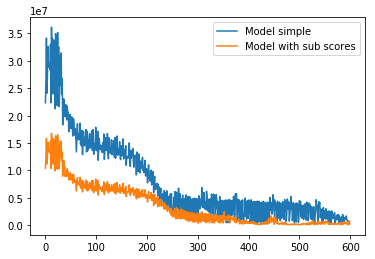

In [202]:
xs = np.arange(600)
#plt.plot(xs, tl10, label='Model 10')
plt.plot(xs, tl0, label='Model simple')
plt.plot(xs, tl10, label='Model with sub scores')
plt.legend()


In [203]:
def get_stats(obj):
    val_labels = json.loads(obj['val_labels'])
    val_preds = json.loads(obj['val_pred'])
    pvals = pearsonr(val_labels, val_preds)
    
    return pvals[0], pvals[1]

def get_stats_sub(obj10):
    val_labels = json.loads(obj['val_labels'])
    val_preds = json.loads(obj['val_pred'])
    pvals = pearsonr(val_labels, val_preds)
    
    return pvals[0], pvals[1]

(0.7921305318042207, 9.788974488255848e-23) (0.7272866307665267, 1.0476056893774535e-17)


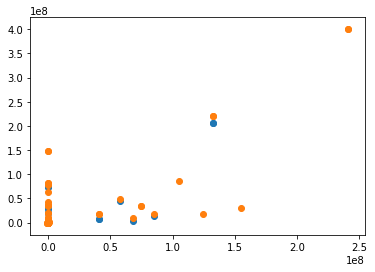

In [204]:
print(get_stats(obj0), get_stats_sub(obj10))
plt.scatter(json.loads(obj0['val_labels']),json.loads(obj0['val_pred']))
plt.scatter(json.loads(obj10['val_labels']),json.loads(obj10['val_pred']))

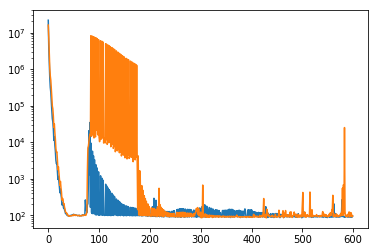

In [205]:
plt.plot(np.arange(600), json.loads(obj0['errors']), label = 'simple')
plt.plot(np.arange(600), json.loads(obj10['errors']), label = 'subscore')
plt.yscale('log')
